# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = btc_price*my_btc
my_eth_value = eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $69985.43
The current value of your 5.3 ETH is $22475.83


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-13", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df.head()

AGG                                       SPY  \
                          open     high     low   close   volume    open   
time                                                                       
2021-09-13 00:00:00-04:00  116  116.075  115.96  116.03  3289881  448.65   

                                                             
                             high     low   close    volume  
time                                                         
2021-09-13 00:00:00-04:00  448.92  444.11  446.56  75103627

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df['AGG']['close'])
spy_close_price = float(df['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.03
Current SPY closing price: $446.56


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price*my_agg
my_spy_value = spy_close_price*my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22328.00
The current value of your 200 AGG shares is $23206.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
data = [my_btc_value+my_eth_value, my_spy_value+my_agg_value]

# Create savings DataFrame
df_savings = pd.DataFrame(data, index = ['crypto','shares'], columns=['amount'])
# Display savings DataFrame
display(df_savings)

,amount
crypto,92461.261267
shares,45534.000000


<AxesSubplot:ylabel='amount'>

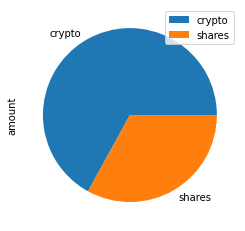

In [12]:
# Plot savings pie chart
df_savings.plot(kind='pie', y='amount')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings and Validate saving health
if float(df_savings.sum()) > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif float(df_savings.sum()) == emergency_fund:
    print('Congratulations! You have reached your financial goal.')
else:
    print(f'You are ${emergency_fund - float(df_savings.sum())} away from the financial goal.')


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-09-13', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-09-13', tz='America/New_York').isoformat()

In [15]:
 # Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit=1000
).df
# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-09-21 00:00:00-04:00  109.82  109.85  109.68  109.680  2102279.0     NaN   
2017-09-22 00:00:00-04:00  109.86  109.90  109.75  109.785  1325024.0  249.05   
2017-09-25 00:00:00-04:00  109.85  110.04  109.82  110.025  3031529.0  249.14   
2017-09-26 00:00:00-04:00  109.95  110.02  109.88  109.990  2074080.0  249.42   
2017-09-27 00:00:00-04:00  109.67  109.75  109.60  109.668  1439682.0  249.88   

                                                                  
                               high      low   close      volume  
time                                                              
2017-09-21 00:00:00-04:00       NaN      NaN     NaN         NaN  
2017-09-22 00:00:00-04:00  249.6300  249.020  249.42  31078666.0  
2017-09-25 00:00:00-04:00  249.5532  248.080  248.94  42826453.0  
2017-09-26 00:00:00-04:00  249.7000  248.805  249.05  36761208.0  
2017-09-27 00:00:00-04:00  250.4900  248.870  250.02  51473231.0

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC30 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [my_agg_value/(my_agg_value+my_spy_value), my_spy_value/(my_agg_value+my_spy_value)],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC30.portfolio_data.head().dropna(inplace=True)

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
cum_returns30 = MC30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 400.


In [ ]:
# Plot simulation outcomes
MC30.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
MC30.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC30.summarize_cumulative_return()
# Print summary statistics
print(tbl)

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
INIT_INVESTMENT = 20000
initial_investment = INIT_INVESTMENT

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = INIT_INVESTMENT*1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.1, 0.9],
    num_simulation = 500,
    num_trading_days = 252*5
)


In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
cum_returns5 = MC5.calc_cumulative_return()


In [ ]:
# Plot simulation outcomes
MC5.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
MC5.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl5 = MC5.summarize_cumulative_return()
# Print summary statistics
print(tbl5)

In [ ]:
# Set initial investment
initial_investment = INIT_INVESTMENT*12

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl5[8]*initial_investment,2)
ci_upper_five = round(tbl5[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.2, 0.8],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
cum_returns10 = MC10.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
MC10.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
MC10.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl10 = MC10.summarize_cumulative_return()
# Print summary statistics
print(tbl10)

In [ ]:
# Set initial investment
initial_investment = 6*INIT_INVESTMENT

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl5[8]*initial_investment,2)
ci_upper_ten = round(tbl5[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")